This notebook will include a short exploration of region analysis by terms. First, we are going to use the terms in the across-front momentum equation

In [1]:
using MultivariateStats
include("src-fig/plotting.jl")

foldername = "../scratch/Project/Strain"

iterations, times = iterations_times(foldername)
sp = simulation_parameters(foldername)
xsᶜ, xsᶠ, ysᶜ, ysᶠ, zsᶜ, zsᶠ = grid_nodes(foldername)
inds = centre_indices(foldername);

In [138]:
# Create some points
iteration = iterations[800]
filename = joinpath(foldername, "TKE.jld2")
data = let gf(str) = time_average_of(a->a[inds, :][:], filename, str, iterations[600:800]),
    vsp = gf("VSP")
    lsp = gf("LSP")
    bflux = gf("BFLUX")
    ε = gf("ε")
    
    #total = abs.(.+(pxfv, uu, u′u′, wu, w′u′, v′u′, Fu, strain)) .+ 1e-6
    hcat(vsp, lsp, bflux, ε)# ./ total
end;

In [133]:
M = fit(KernelPCA, transpose(data[1:1:end, :]); maxoutdim=4, kernel=(x, y)->2/(1+exp(-transpose(x) * y))-1);

In [139]:
M = fit(PCA, transpose(data[1:10:end, :]); maxoutdim=4);

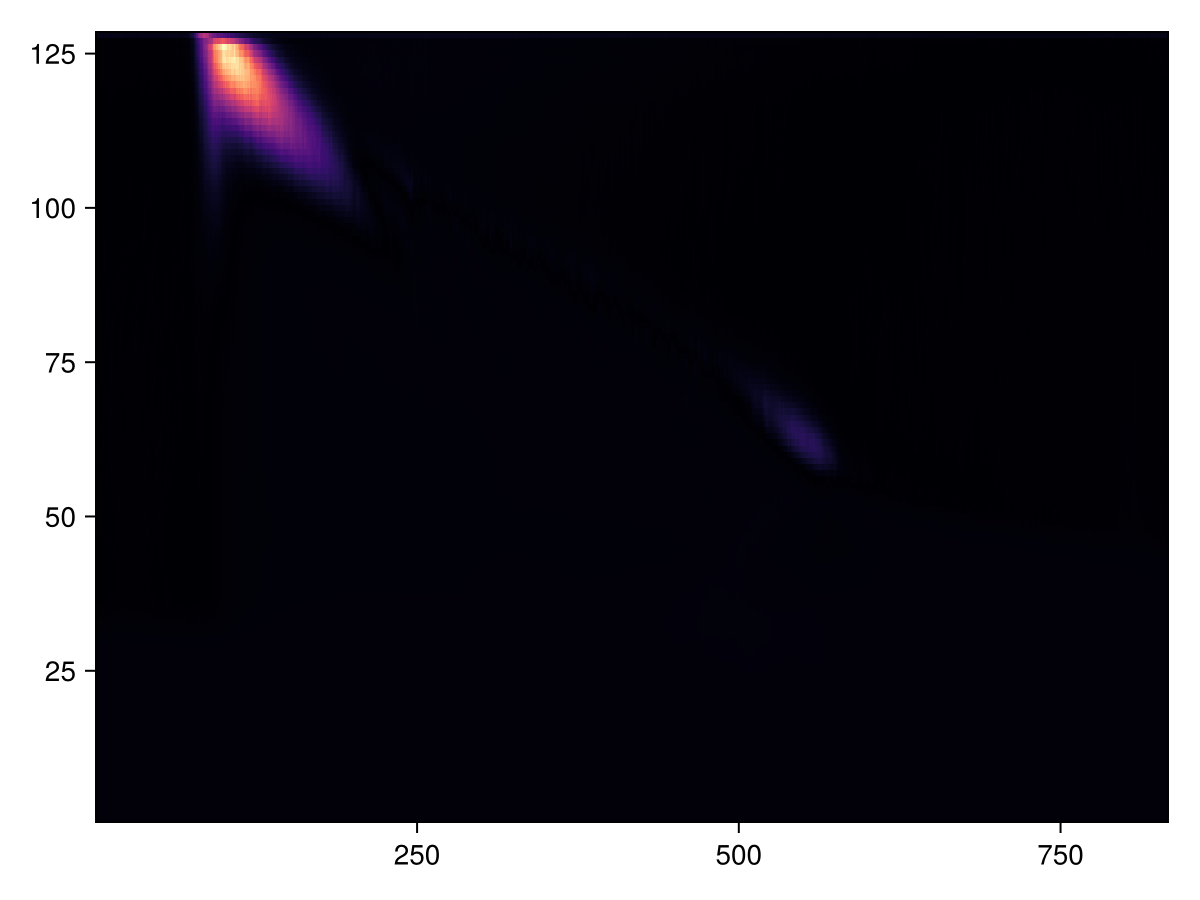

In [145]:
data_pcs = predict(M, transpose(data))[1, :]
heatmap(abs.(reshape(transpose(data_pcs), length(inds), sp.Nz)), colormap=:magma)

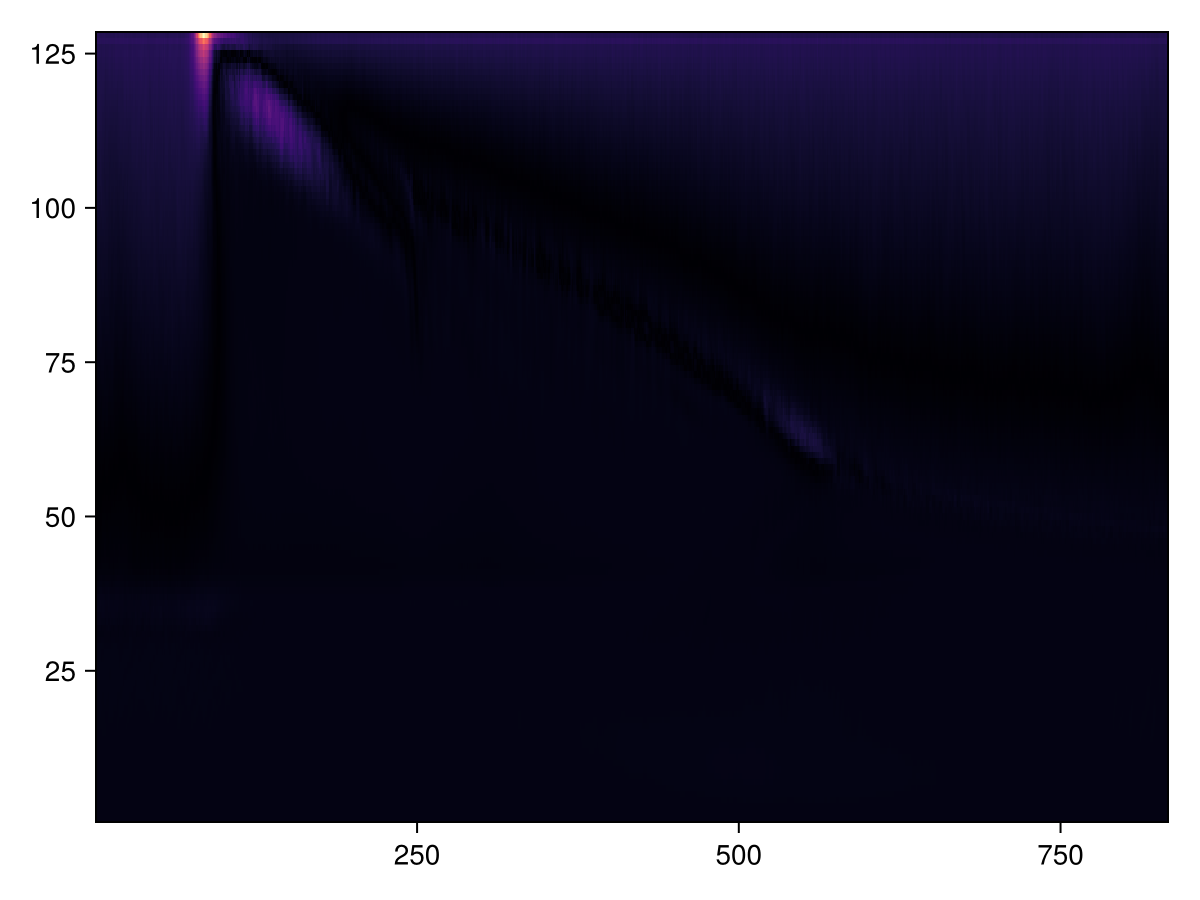

In [141]:
data_pcs = predict(M, transpose(data))[2, :]
heatmap(abs.(reshape(transpose(data_pcs), length(inds), sp.Nz)), colormap=:magma)

In [136]:
N = fit(MDS, transpose(data[1:10:end, :]); maxoutdim=2, distances=false);

┌ Warning: The last eigenpair is degenerate with 10661 others; 10661 were ignored. Answer is not unique
└ @ MultivariateStats ~/.julia/packages/MultivariateStats/u1yuF/src/cmds.jl:281


In [137]:
N

Classical MDS(indim = 3, outdim = 2)